<center><h1> Inspecting Data from Guastaroba et al. <h1/><center/>

This notebook tries to replicate the results of the above paper.

## Preamble

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import re
import os

# <center> 1. Loading Data </data>

Then we define the path for the relevant folder.

In [25]:
pathInSample = "./Data/Data from Guastaroba (2020)/InSample_CVaR_EITP";
pathOutOfSample = "./Data/Data from Guastaroba (2020)/OutofSample_CVaR_EITP";
pathCSV = "./Data/Data from Guastaroba (2020)/CSV";

In [26]:
filesIS = os.listdir(pathInSample);
filesOoS = os.listdir(pathOutOfSample);

filesIS = list(filter(lambda file : file != 'Readme.txt', filesIS))
filesOoS = list(filter(lambda file : file != 'Readme.txt', filesOoS))

## In-Sample Data Set

In [27]:
data_IS = {file:[] for file in filesIS};
index_IS = {file:[] for file in filesIS};

In [28]:
for file in filesIS:
    
    with open(pathInSample + "/" + file, 'r') as f:

        d = f.readlines()
        print('Reading and transforming file: {}'.format(file));

        nSecurities = int(d[0]);
        nScenarios = int(d[1]);
        prob = float(d[2]);

        # Prepare matrix of results
        data = np.zeros([nSecurities,nScenarios]);

        # Read first line specially
        lineFirst = d[3];
        lineFirst = lineFirst[:-2];
        lineFirst = np.array([float(val) for val in lineFirst.replace("\n", "").replace("[","").replace("]","").split(",")]).reshape([1,nScenarios])
        data[0,:] = lineFirst;

        # Read all other lines except for the last one
        index = 1;
        for line in d[4:-2]:
            line = line[:-2];
            line = np.array([float(val) for val in line.replace("[","").replace("]","").split(",")]).reshape([1,nScenarios])
            data[index,:] = line;
            index += 1;

        # Read last line specially
        lineLast = d[-2];
        lineLast = np.array([float(val) for val in lineLast.replace("\n", "").replace("[","").replace("]","").split(",")]).reshape([1,nScenarios])
        data[-1,:] = lineLast;
        
        # Save the dataset in the dictionary
        data_IS[file] = np.transpose(data);
        
        # Read index
        index_data = d[-1];
        index_data = np.array([float(val) for val in index_data.replace("[","").replace("]","").split(",")]).reshape([1,nScenarios])
        index_IS[file] = index_data;
        
        # Save the results to .csv
        interimVar = pd.DataFrame(np.concatenate((np.transpose(index_IS[file]),data_IS[file]), axis=1));
        interimVar.to_csv(pathCSV + "/{}.csv".format(file[:-4]), header=False, index=False);

Reading and transforming file: IS-GMS-UU.dat
Reading and transforming file: IS-GMS-UD.dat
Reading and transforming file: IS-ORL-IT6.dat
Reading and transforming file: IS-ORL-IT7.dat
Reading and transforming file: IS-ORL-IT5.dat
Reading and transforming file: IS-ORL-IT4.dat
Reading and transforming file: IS-ORL-IT1.dat
Reading and transforming file: IS-ORL-IT3.dat
Reading and transforming file: IS-ORL-IT2.dat
Reading and transforming file: IS-GMS-DU.dat
Reading and transforming file: IS-ORL-IT8.dat
Reading and transforming file: IS-GMS-DD.dat


In [29]:
np.transpose(index_IS[file]).shape

(104, 1)

Then we reload with .csv to check the validity.

In [30]:
readExample = pd.read_csv(pathCSV + "/IS-GMS-UU.csv", header=None);
readExampleNumpy = readExample.values;

## Out-of-Sample Data Set

In [31]:
data_OoS = {file:[] for file in filesOoS};
index_OoS = {file:[] for file in filesOoS};

In [32]:
for file in filesOoS:
    
    with open(pathOutOfSample + "/" + file, 'r') as f:

        d = f.readlines()
        print('Reading and transforming file: {}'.format(file));

        nScenarios = int(d[0]);
        nSecurities = len(d) - 2;

        # Prepare matrix of results
        data = np.zeros([nSecurities,nScenarios+1]);

        # Read first line specially
        lineFirst = d[1];
        lineFirst = lineFirst[:-2];
        lineFirst = np.array([float(val) for val in lineFirst.replace("\n", "").replace("[","").replace("]","").split(",")]).reshape([1,nScenarios+1])
        data[0,:] = lineFirst;

        # Read all other lines except for the last one
        index = 1;
        for line in d[2:-2]:
            line = line[:-2];
            line = np.array([float(val) for val in line.replace("[","").replace("]","").split(",")]).reshape([1,nScenarios+1])
            data[index,:] = line;
            index += 1;

        # Read last line specially
        lineLast = d[-2];
        lineLast = np.array([float(val) for val in lineLast.replace("\n", "").replace("[","").replace("]","").split(",")]).reshape([1,nScenarios+1])
        data[-1,:] = lineLast;
        
        # Save the dataset in the dictionary
        data_OoS[file] = np.transpose(data);

        # Read index
        index_data = d[-1];
        index_data = np.array([float(val) for val in index_data.replace("[","").replace("]","").split(",")]).reshape([1,nScenarios+1])
        index_OoS[file] = index_data;
        
        # Save the results to .csv
        interimVar = pd.DataFrame(np.concatenate((np.transpose(index_OoS[file]),data_OoS[file]), axis=1));
        interimVar.to_csv(pathCSV + "/{}.csv".format(file[:-4]), header=False, index=False);

Reading and transforming file: OoS-GMS-UU.dat
Reading and transforming file: OoS-GMS-UD.dat
Reading and transforming file: OoS-ORL-IT2.dat
Reading and transforming file: OoS-ORL-IT3.dat
Reading and transforming file: OoS-ORL-IT1.dat
Reading and transforming file: OoS-ORL-IT4.dat
Reading and transforming file: OoS-ORL-IT5.dat
Reading and transforming file: OoS-ORL-IT7.dat
Reading and transforming file: OoS-ORL-IT6.dat
Reading and transforming file: OoS-GMS-DU.dat
Reading and transforming file: OoS-ORL-IT8.dat
Reading and transforming file: OoS-GMS-DD.dat


Then we read the values to check for validity.

In [33]:
readExample = pd.read_csv(pathCSV + "/OoS-GMS-UU.csv", header=None);
readExampleNumpy = readExample.values;

# <center> 2. Vizualising Data from Files </data>

## Market Periods in Data Set GMS

We start by constructing the figure shown in "Fig. 1" in Enhanced Index Tracking with CVaR-based ratio measures.

In [34]:
list(index_IS.keys())

['IS-GMS-UU.dat',
 'IS-GMS-UD.dat',
 'IS-ORL-IT6.dat',
 'IS-ORL-IT7.dat',
 'IS-ORL-IT5.dat',
 'IS-ORL-IT4.dat',
 'IS-ORL-IT1.dat',
 'IS-ORL-IT3.dat',
 'IS-ORL-IT2.dat',
 'IS-GMS-DU.dat',
 'IS-ORL-IT8.dat',
 'IS-GMS-DD.dat']

In [35]:
list(index_OoS.keys())

['OoS-GMS-UU.dat',
 'OoS-GMS-UD.dat',
 'OoS-ORL-IT2.dat',
 'OoS-ORL-IT3.dat',
 'OoS-ORL-IT1.dat',
 'OoS-ORL-IT4.dat',
 'OoS-ORL-IT5.dat',
 'OoS-ORL-IT7.dat',
 'OoS-ORL-IT6.dat',
 'OoS-GMS-DU.dat',
 'OoS-ORL-IT8.dat',
 'OoS-GMS-DD.dat']

In [36]:
UU = np.zeros(index_IS['IS-GMS-UU.dat'].shape[1] + index_OoS['OoS-GMS-UU.dat'].shape[1])
UU[-53:] = index_OoS['OoS-GMS-UU.dat'];
indices = np.flip(np.arange(-53-(index_IS['IS-GMS-UU.dat'].shape[1]),-53,1))
returns = np.flip(index_IS['IS-GMS-UU.dat'])[0] # Has to be selected as it is a matrix

for idx, x in enumerate(indices):
    UU[indices[idx]] = UU[indices[idx]+1]/(1+returns[idx]);

In [37]:
UD = np.zeros(index_IS['IS-GMS-UD.dat'].shape[1] + index_OoS['OoS-GMS-UD.dat'].shape[1])
UD[-53:] = index_OoS['OoS-GMS-UD.dat'];
indices = np.flip(np.arange(-53-(index_IS['IS-GMS-UD.dat'].shape[1]),-53,1))
returns = np.flip(index_IS['IS-GMS-UD.dat'])[0] # Has to be selected as it is a matrix

for idx, x in enumerate(indices):
    UD[indices[idx]] = UD[indices[idx]+1]/(1+returns[idx]);

In [38]:
DD = np.zeros(index_IS['IS-GMS-DD.dat'].shape[1] + index_OoS['OoS-GMS-DD.dat'].shape[1])
DD[-53:] = index_OoS['OoS-GMS-DD.dat'];
indices = np.flip(np.arange(-53-(index_IS['IS-GMS-DD.dat'].shape[1]),-53,1))
returns = np.flip(index_IS['IS-GMS-DD.dat'])[0] # Has to be selected as it is a matrix

for idx, x in enumerate(indices):
    DD[indices[idx]] = DD[indices[idx]+1]/(1+returns[idx]);

In [39]:
DU = np.zeros(index_IS['IS-GMS-DU.dat'].shape[1] + index_OoS['OoS-GMS-DU.dat'].shape[1])
DU[-53:] = index_OoS['OoS-GMS-DU.dat'];
indices = np.flip(np.arange(-53-(index_IS['IS-GMS-DU.dat'].shape[1]),-53,1))
returns = np.flip(index_IS['IS-GMS-DU.dat'])[0] # Has to be selected as it is a matrix

for idx, x in enumerate(indices):
    DU[indices[idx]] = DU[indices[idx]+1]/(1+returns[idx]);

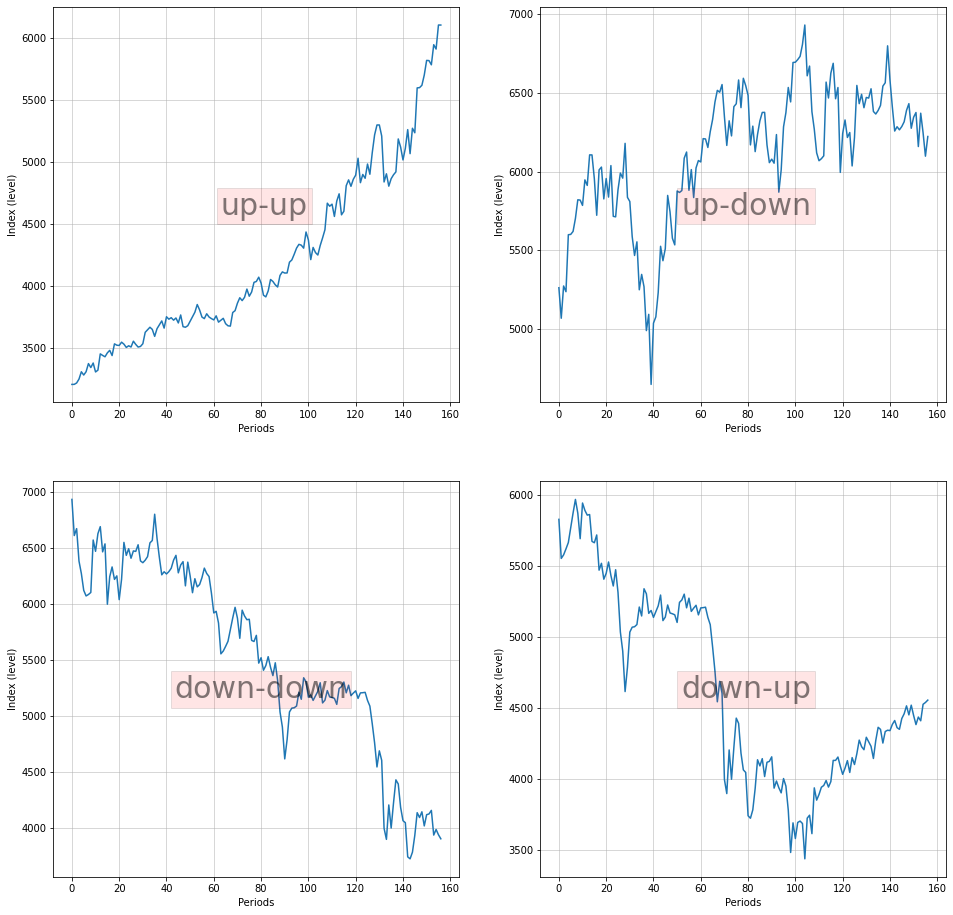

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(16,16))

axs[0,0].set(xlabel='Periods', ylabel='Index (level)');
axs[0,0].grid(True, linestyle='-', linewidth=0.5);
fig.text(0.27, 0.70, 'up-up', fontsize = 30, alpha=0.5, bbox = dict(facecolor = 'red', alpha = 0.1))
axs[0,0].plot(UU);

axs[0,1].set(xlabel='Periods', ylabel='Index (level)');
axs[0,1].grid(True, linestyle='-', linewidth=0.5);
fig.text(0.67, 0.70, 'up-down', fontsize = 30, alpha=0.5, bbox = dict(facecolor = 'red', alpha = 0.1))
axs[0,1].plot(UD);

axs[1,0].set(xlabel='Periods', ylabel='Index (level)');
axs[1,0].grid(True, linestyle='-', linewidth=0.5);
fig.text(0.23, 0.28, 'down-down', fontsize = 30, alpha=0.5, bbox = dict(facecolor = 'red', alpha = 0.1))
axs[1,0].plot(DD);

axs[1,1].set(xlabel='Periods', ylabel='Index (level)');
axs[1,1].grid(True, linestyle='-', linewidth=0.5);
#Adding text inside a rectangular box by using the keyword 'bbox'
fig.text(0.67, 0.28, 'down-up', fontsize = 30, alpha=0.5, bbox = dict(facecolor = 'red', alpha = 0.1))
axs[1,1].plot(DU);
    

Then we can check the overlap.

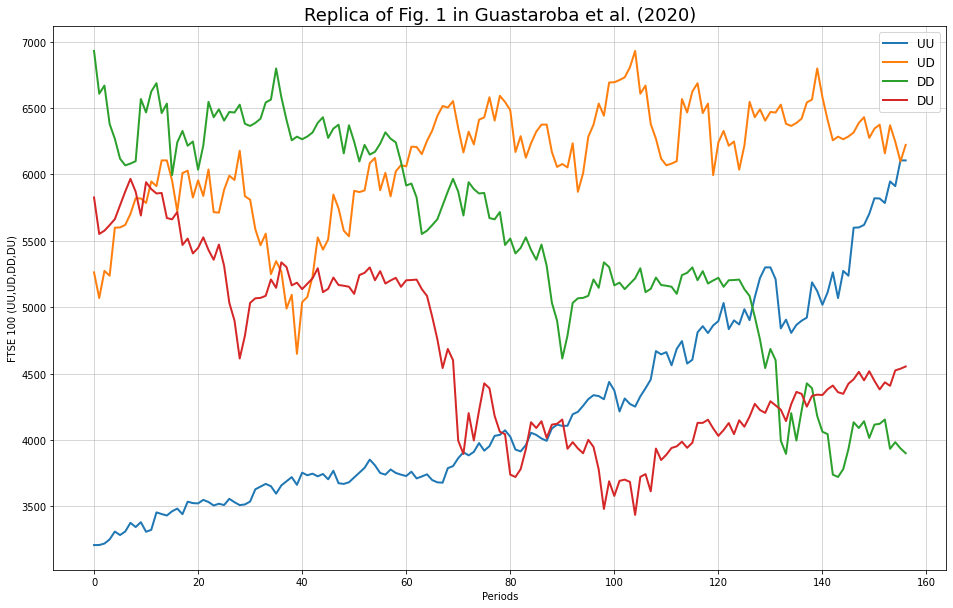

In [57]:
# Create figure
fig, ax = plt.subplots(figsize=(16, 10))
    
# Plot index
ax.plot(UU, label=f"UU", linestyle='-', linewidth=2, alpha=1.0)
ax.plot(UD, label=f"UD", linestyle='-', linewidth=2, alpha=1.0)
ax.plot(DD, label=f"DD", linestyle='-', linewidth=2, alpha=1.0)
ax.plot(DU, label=f"DU", linestyle='-', linewidth=2, alpha=1.0)

# Title and labels
#ax.set_title("Plot of Selected Data in Indtrack1.txt")
ax.set_xlabel("Periods")
ax.set_ylabel("FTSE 100 (UU,UD,DD,DU)")

# Legend
ax.legend(loc="best", fontsize="large")

# Grid lines
ax.grid(True, linestyle='-', linewidth=0.5)

# Color palette
#colors = plt.cm.viridis(np.linspace(0, 1, n+1))
#ax.set_prop_cycle('color', colors)

# Set title
plt.title("Replica of Fig. 1 in Guastaroba et al. (2020)", fontsize=18)

# Show plot
plt.show()

The data looks very similar to the plots in the article. We can proceed.

## Out-of-Sample

In [42]:
index = 0;
for file in filesOoS:
    print('{}: {}'.format(index, file));
    index += 1;

0: OoS-GMS-UU.dat
1: OoS-GMS-UD.dat
2: OoS-ORL-IT2.dat
3: OoS-ORL-IT3.dat
4: OoS-ORL-IT1.dat
5: OoS-ORL-IT4.dat
6: OoS-ORL-IT5.dat
7: OoS-ORL-IT7.dat
8: OoS-ORL-IT6.dat
9: OoS-GMS-DU.dat
10: OoS-ORL-IT8.dat
11: OoS-GMS-DD.dat


We start by loading all the indices. Start by selecting an index from the list above.

In [43]:
selectedIndex = 0;

Then run the following code to finish the plot.

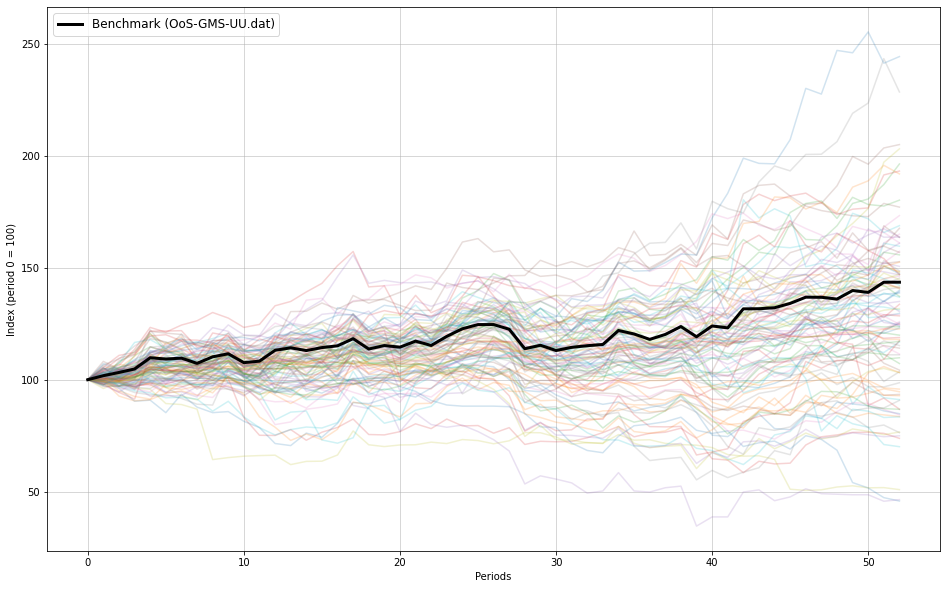

In [44]:
# Create figure
fig, ax = plt.subplots(figsize=(16, 10))

# Plot all normalized constituents
n,T = data_OoS[list(data_OoS.keys())[selectedIndex]].shape;

# Selected data
selectedData = data_OoS[list(data_OoS.keys())[selectedIndex]];
selectedData = (selectedData/selectedData[0]) * 100
ax.plot(selectedData, alpha = 0.2);
    
# Plot index
intermediateIndex = np.transpose(index_OoS[list(index_OoS.keys())[selectedIndex]]);
index = (intermediateIndex/intermediateIndex[0]) * 100;
ax.plot(index, label="Benchmark ({})".format(list(data_OoS.keys())[selectedIndex]), linestyle='-', linewidth=3, color = 'black', alpha=1.0)

# Title and labels
#ax.set_title("Plot of Selected Data in Indtrack1.txt")
ax.set_xlabel("Periods")
ax.set_ylabel("Index (period 0 = 100)")

# Legend
ax.legend(loc="best", fontsize="large")

# Grid lines
ax.grid(True, linestyle='-', linewidth=0.5)

# Color palette
colors = plt.cm.viridis(np.linspace(0, 1, n+1))
#ax.set_prop_cycle('color', colors)

# Show plot
plt.show()

## In-Sample

In [45]:
index = 0;
for file in filesIS:
    print('{}: {}'.format(index, file));
    index += 1;

0: IS-GMS-UU.dat
1: IS-GMS-UD.dat
2: IS-ORL-IT6.dat
3: IS-ORL-IT7.dat
4: IS-ORL-IT5.dat
5: IS-ORL-IT4.dat
6: IS-ORL-IT1.dat
7: IS-ORL-IT3.dat
8: IS-ORL-IT2.dat
9: IS-GMS-DU.dat
10: IS-ORL-IT8.dat
11: IS-GMS-DD.dat


In [53]:
selectedIndex = 9;

(104, 100)

In [58]:
interimVar = pd.DataFrame(data_IS[list(data_IS.keys())[selectedIndex]]);

In [59]:
interimVar

0         1         2         3         4         5         6   \
0   -0.009441 -0.005797 -0.120811 -0.083187 -0.034017  0.028097 -0.016043   
1    0.040323  0.125364  0.072217 -0.032799 -0.063698 -0.007143  0.059783   
2    0.042988 -0.006045 -0.032741 -0.050000 -0.015487  0.041289 -0.008718   
3    0.013514  0.026933 -0.018375  0.047421 -0.009551  0.015620  0.029488   
4    0.029333 -0.005922  0.031527  0.044776 -0.009075 -0.025436 -0.017085   
..        ...       ...       ...       ...       ...       ...       ...   
99  -0.026549  0.021357 -0.147966  0.029596 -0.008580 -0.009574 -0.035445   
100  0.096504  0.008610 -0.018930 -0.006081  0.011538  0.035766  0.060241   
101 -0.018495 -0.045732 -0.026846  0.004449 -0.000951 -0.007933 -0.078977   
102  0.018194 -0.022364  0.017241  0.029900 -0.024738 -0.018344 -0.009254   
103 -0.074027 -0.001307 -0.130508 -0.026882 -0.082927 -0.058457 -0.113325   

           7         8         9   ...        90        91        92  \
0   -0.046617 -0.016773 -0.055635  ... -0.015081 -0.011834 -0.025830   
1   -0.023659  0.039805  0.015744  ... -0.102473  0.008982 -0.119318   
2    0.006462  0.025000  0.071000  ...  0.070866  0.056380  0.075269   
3    0.006421 -0.010671 -0.026611  ...  0.098039  0.058989 -0.024000   
4   -0.004785  0.053929  0.038369  ...  0.043527  0.047745  0.006148   
..        ...       ...       ...  ...       ...       ...       ...   
99   0.003386 -0.042463 -0.066667  ...  0.042373 -0.049689 -0.022654   
100 -0.031496  0.062084  0.116618  ... -0.033875  0.039216 -0.026490   
101 -0.018583 -0.027140 -0.018277  ...  0.049088 -0.015723 -0.003401   
102  0.039053 -0.042918 -0.037234  ...  0.036096  0.039936  0.010239   
103 -0.015945  0.015695 -0.088398  ... -0.046452 -0.133641  0.089527   

           93        94        95        96        97        98        99  
0   -0.116104 -0.039623 -0.062500  0.018245  0.001123 -0.032694 -0.148148  
1   -0.111676 -0.039293  0.022222 -0.029864 -0.082198 -0.054037  0.032609  
2    0.112239  0.053170 -0.021739  0.020000 -0.002469 -0.031264 -0.032456  
3    0.016100 -0.025243 -0.044444 -0.034680  0.007378 -0.023052 -0.066183  
4    0.023848  0.097610  0.255814 -0.012506  0.000000  0.000000  0.077670  
..        ...       ...       ...       ...       ...       ...       ...  
99  -0.037348 -0.047945  0.051852  0.076940  0.030461  0.001766 -0.028116  
100 -0.134600 -0.035971 -0.042254 -0.030604 -0.010431 -0.010508 -0.005786  
101 -0.288655  0.044776  0.007353  0.100007 -0.270671 -0.021204 -0.014549  
102  0.046945  0.107143 -0.021898  0.065393 -0.016854 -0.025268 -0.042323  
103 -0.164619 -0.021505  0.014925 -0.043421 -0.044103  0.014829 -0.070915  

[104 rows x 100 columns]

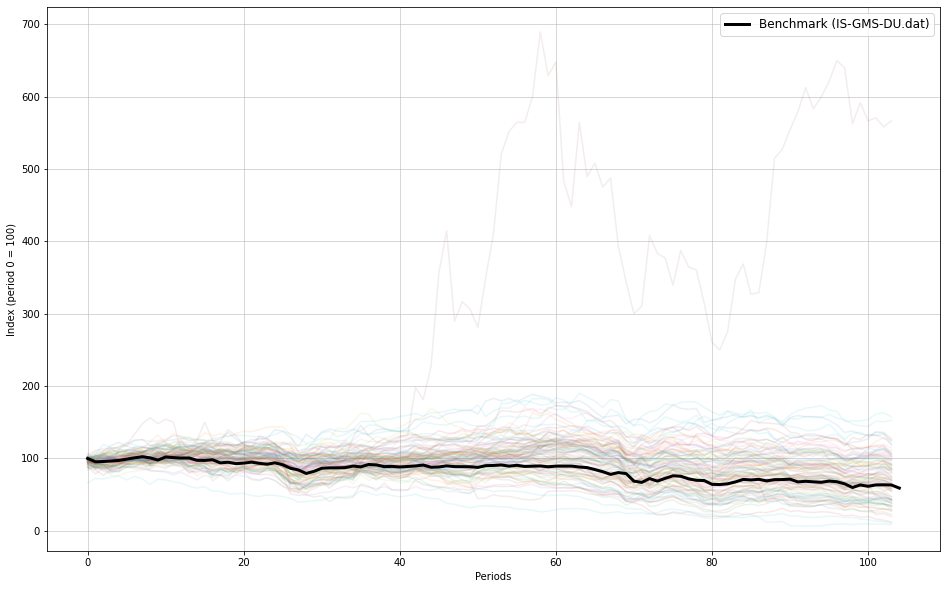

In [54]:
# Create figure
fig, ax = plt.subplots(figsize=(16, 10))

# Selected data
selectedData = data_IS[list(data_IS.keys())[selectedIndex]];
selectedData = np.cumprod(selectedData + 1,axis=0) * 100;
ax.plot(selectedData, alpha = 0.1);
    
# Plot index
intermediateIndex = np.transpose(index_IS[list(index_IS.keys())[selectedIndex]]);
intermediateIndex = np.cumprod(intermediateIndex + 1)
index = np.insert(intermediateIndex, 0, 1.0, axis=0) * 100;
ax.plot(index, label="Benchmark ({})".format(list(data_IS.keys())[selectedIndex]), linestyle='-', linewidth=3, color = 'black', alpha=1.0)

# Title and labels
#ax.set_title("Plot of Selected Data in Indtrack1.txt")
ax.set_xlabel("Periods")
ax.set_ylabel("Index (period 0 = 100)")

# Legend
ax.legend(loc="best", fontsize="large")

# Grid lines
ax.grid(True, linestyle='-', linewidth=0.5)

# Color palette
colors = plt.cm.viridis(np.linspace(0, 1, n+1))
#ax.set_prop_cycle('color', colors)

# Show plot
plt.show()